<a href="https://colab.research.google.com/github/beratcmn/deep-learning-fundamentals/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib

In [2]:
!wget https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/main/unit01-ml-intro/1.6-perceptron-in-python/perceptron_toydata-truncated.txt

--2023-08-19 22:53:35--  https://raw.githubusercontent.com/Lightning-AI/dl-fundamentals/main/unit01-ml-intro/1.6-perceptron-in-python/perceptron_toydata-truncated.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268 [text/plain]
Saving to: ‘perceptron_toydata-truncated.txt’

perceptron_toydata- 100%[===================>]     268  --.-KB/s    in 0s      

2023-08-19 22:53:35 (12.1 MB/s) - ‘perceptron_toydata-truncated.txt’ saved [268/268]



In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [6]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [8]:
X_train, X_train.shape

(array([[ 0.77, -1.14],
        [-0.33,  1.44],
        [ 0.91, -3.07],
        [-0.37, -1.91],
        [-0.63, -1.53],
        [ 0.39, -1.99],
        [-0.49, -2.74],
        [-0.68, -1.52],
        [-0.1 , -3.43],
        [-0.05, -1.95],
        [ 3.88,  0.65],
        [ 0.73,  2.97],
        [ 0.83,  3.94],
        [ 1.59,  1.25],
        [ 1.14,  3.91],
        [ 1.73,  2.8 ],
        [ 1.31,  1.85],
        [ 1.56,  3.85],
        [ 1.23,  2.54],
        [ 1.33,  2.03]]),
 (20, 2))

In [9]:
y_train, y_train.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), (20,))

In [11]:
np.bincount(y_train)

array([10, 10])

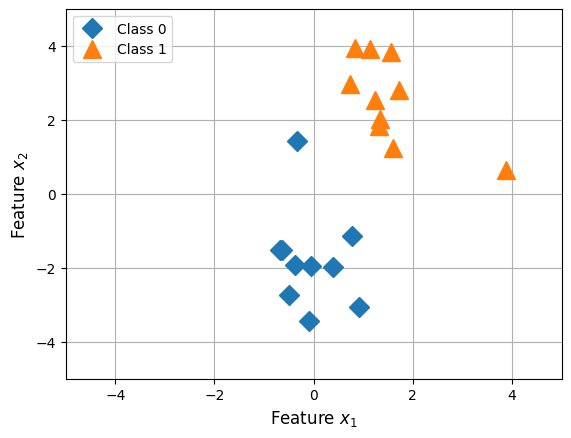

In [15]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [67]:
import random

class Perceptron:
    def __init__(self, num_features, learning_rate):
        random.seed(42)
        self.num_features = num_features
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.learning_rate = learning_rate
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        self.bias = self.bias * self.learning_rate
        for i, _ in enumerate(self.weights):
            self.weights[i] = self.weights[i] * self.learning_rate

        return error

In [70]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        if (epoch > 1 and epoch < epochs) and error_count == 0:
            print("Model is trained perfectly. No need to train further.")
            break

        print(f"Epoch {epoch+1} errors {error_count}")

In [73]:
ppn = Perceptron(num_features=2, learning_rate=1.1)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=100)

Epoch 1 errors 4
Epoch 2 errors 0
Model is trained perfectly. No need to train further.


In [66]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: [439.0402931527897, 351.12260982709563]
  Bias: -635.7642248550859


In [49]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [50]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [51]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


In [52]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

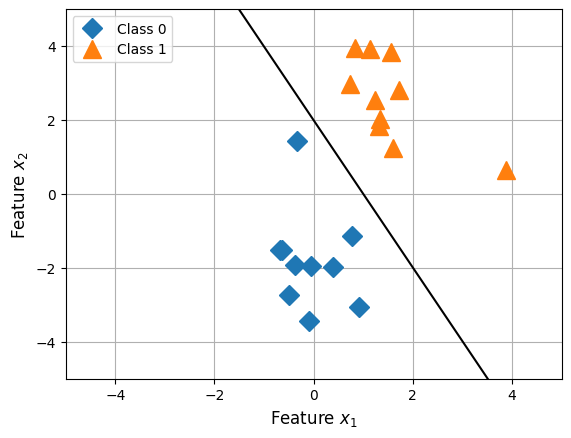

In [53]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()